In [ ]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the smaller graph
with open("/content/drive/MyDrive/Colab Notebooks/dataset/smaller/small_graph.pickle", "rb") as f:
    smaller_graph = pickle.load(f)

In [ ]:
#Task 1 (a) - general analysis of graph

num_nodes = smaller_graph.number_of_nodes()
num_edges = smaller_graph.number_of_edges()
density = nx.density(smaller_graph)
average_degree = sum(dict(smaller_graph.degree()).values()) / num_nodes
clustering_coefficient = nx.average_clustering(smaller_graph)

In [ ]:
print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)
print("Density:", density)
print("Average Degree:", average_degree)
print("Clustering Coefficient:", clustering_coefficient)

Number of Nodes: 537
Number of Edges: 7715
Density: 0.05360766002390283
Average Degree: 28.733705772811916
Clustering Coefficient: 0.935174327127481


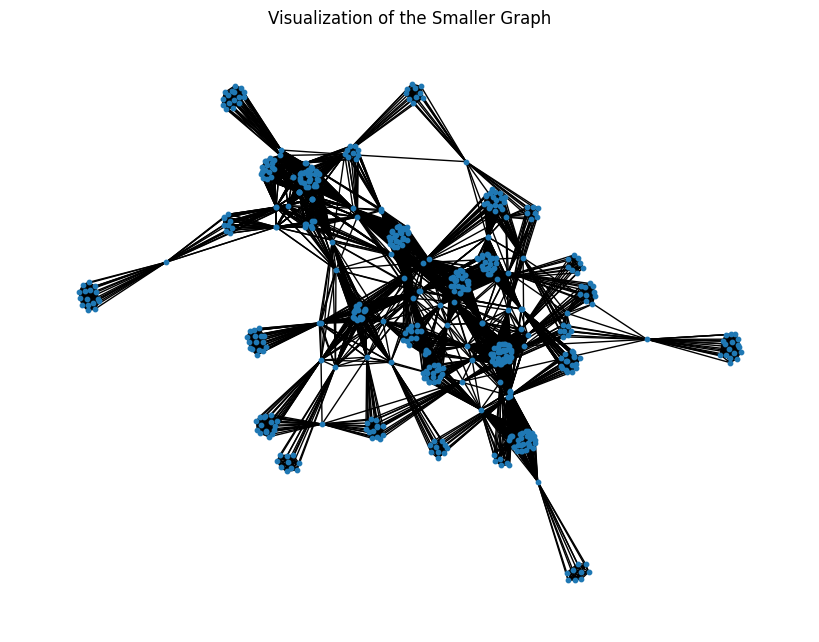

In [ ]:
#Task 1 (b) - network visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
nx.draw(smaller_graph, with_labels=False, node_size=10)
plt.title("Visualization of the Smaller Graph")
plt.show()


In [ ]:
#Task 1 (c) - basic centrality metrics

#Compute Degree Centrality
degree_centrality = nx.degree_centrality(smaller_graph)

#Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(smaller_graph)

#Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(smaller_graph)

#Compute Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(smaller_graph)

In [ ]:
#Print the computed centrality measures for the first 5 nodes
print("Degree Centrality:")
for node, dc in list(degree_centrality.items())[:5]:
    print(f"Node {node}: Degree Centrality {dc}")

print("\nBetweenness Centrality:")
for node, bc in list(betweenness_centrality.items())[:5]:
    print(f"Node {node}: Betweenness Centrality {bc}")

print("\nCloseness Centrality:")
for node, cc in list(closeness_centrality.items())[:5]:
    print(f"Node {node}: Closeness Centrality {cc}")

print("\nEigenvector Centrality:")
for node, ec in list(eigenvector_centrality.items())[:5]:
    print(f"Node {node}: Eigenvector Centrality {ec}")

Degree Centrality:
Node spotify:track:00qOE7OjRl0BpYiCiweZB2: Degree Centrality 0.03544776119402985
Node spotify:track:0J6mQxEZnlRt9ymzFntA6z: Degree Centrality 0.08022388059701492
Node spotify:track:1gcESexgftSuLuML57Y69q: Degree Centrality 0.03544776119402985
Node spotify:track:2b9lp5A6CqSzwOrBfAFhof: Degree Centrality 0.03544776119402985
Node spotify:track:2zYzyRzz6pRmhPzyfMEC8s: Degree Centrality 0.03544776119402985

Betweenness Centrality:
Node spotify:track:00qOE7OjRl0BpYiCiweZB2: Betweenness Centrality 0.0
Node spotify:track:0J6mQxEZnlRt9ymzFntA6z: Betweenness Centrality 0.02647923845066613
Node spotify:track:1gcESexgftSuLuML57Y69q: Betweenness Centrality 0.0
Node spotify:track:2b9lp5A6CqSzwOrBfAFhof: Betweenness Centrality 0.0
Node spotify:track:2zYzyRzz6pRmhPzyfMEC8s: Betweenness Centrality 0.0

Closeness Centrality:
Node spotify:track:00qOE7OjRl0BpYiCiweZB2: Closeness Centrality 0.22964867180805484
Node spotify:track:0J6mQxEZnlRt9ymzFntA6z: Closeness Centrality 0.293216630196

In [ ]:
#Calculate Freeman Centralisation score based on the formula
def freeman_centralisation(G):
    dc = [G.degree(node) for node in G.nodes()]
    max_dc = max(dc)
    n = len(dc)
    numerator = sum([max_dc - c for c in dc])
    denominator = (n-1)*(n-2)
    return float(numerator)/denominator

In [ ]:
f_c = freeman_centralisation(smaller_graph)
print("Freeman Centralisation: %f" %freeman_centralisation(smaller_graph))

Freeman Centralisation: 0.109112


In [ ]:
#Calculate normalized centrality values
degree_values = np.array(list(degree_centrality.values()))
degree_norm = (degree_values - np.min(degree_values)) / (np.max(degree_values) - np.min(degree_values))

betweenness_values = np.array(list(betweenness_centrality.values()))
betweenness_norm = (betweenness_values - np.min(betweenness_values)) / (np.max(betweenness_values) - np.min(betweenness_values))

closeness_values = np.array(list(closeness_centrality.values()))
closeness_norm = (closeness_values - np.min(closeness_values)) / (np.max(closeness_values) - np.min(closeness_values))

eigenvector_values = np.array(list(eigenvector_centrality.values()))
eigenvector_norm = (eigenvector_values - np.min(eigenvector_values)) / (np.max(eigenvector_values) - np.min(eigenvector_values))

In [ ]:
# Calculate average centrality values
avg_betweenness = np.mean(betweenness_values)
avg_closeness = np.mean(closeness_values)
avg_eigenvector = np.mean(eigenvector_values)

# Print the average values
print("Average Betweenness Centrality:", avg_betweenness)
print("Average Closeness Centrality:", avg_closeness)
print("Average Eigenvector Centrality:", avg_eigenvector)

Average Betweenness Centrality: 0.004297340634580971
Average Closeness Centrality: 0.31013721539472994
Average Eigenvector Centrality: 0.017964838787195642


In [ ]:
#Calculate min, max, and average values
min_betweenness = np.min(betweenness_values)
max_betweenness = np.max(betweenness_values)
avg_betweenness = np.mean(betweenness_values)

min_closeness = np.min(closeness_values)
max_closeness = np.max(closeness_values)
avg_closeness = np.mean(closeness_values)

min_eigenvector = np.min(eigenvector_values)
max_eigenvector = np.max(eigenvector_values)
avg_eigenvector = np.mean(eigenvector_values)

# Print the results
print("Betweenness Centrality:")
print(f"  Min: {min_betweenness}, Max: {max_betweenness}, Avg: {avg_betweenness}")

print("\nCloseness Centrality:")
print(f"  Min: {min_closeness}, Max: {max_closeness}, Avg: {avg_closeness}")

print("\nEigenvector Centrality:")
print(f"  Min: {min_eigenvector}, Max: {max_eigenvector}, Avg: {avg_eigenvector}")


Betweenness Centrality:
  Min: 0.0, Max: 0.12880434316149217, Avg: 0.004297340634580971

Closeness Centrality:
  Min: 0.21832993890020366, Max: 0.42505947660586835, Avg: 0.31013721539472994

Eigenvector Centrality:
  Min: 4.084216235227727e-06, Max: 0.15777699766715703, Avg: 0.017964838787195642


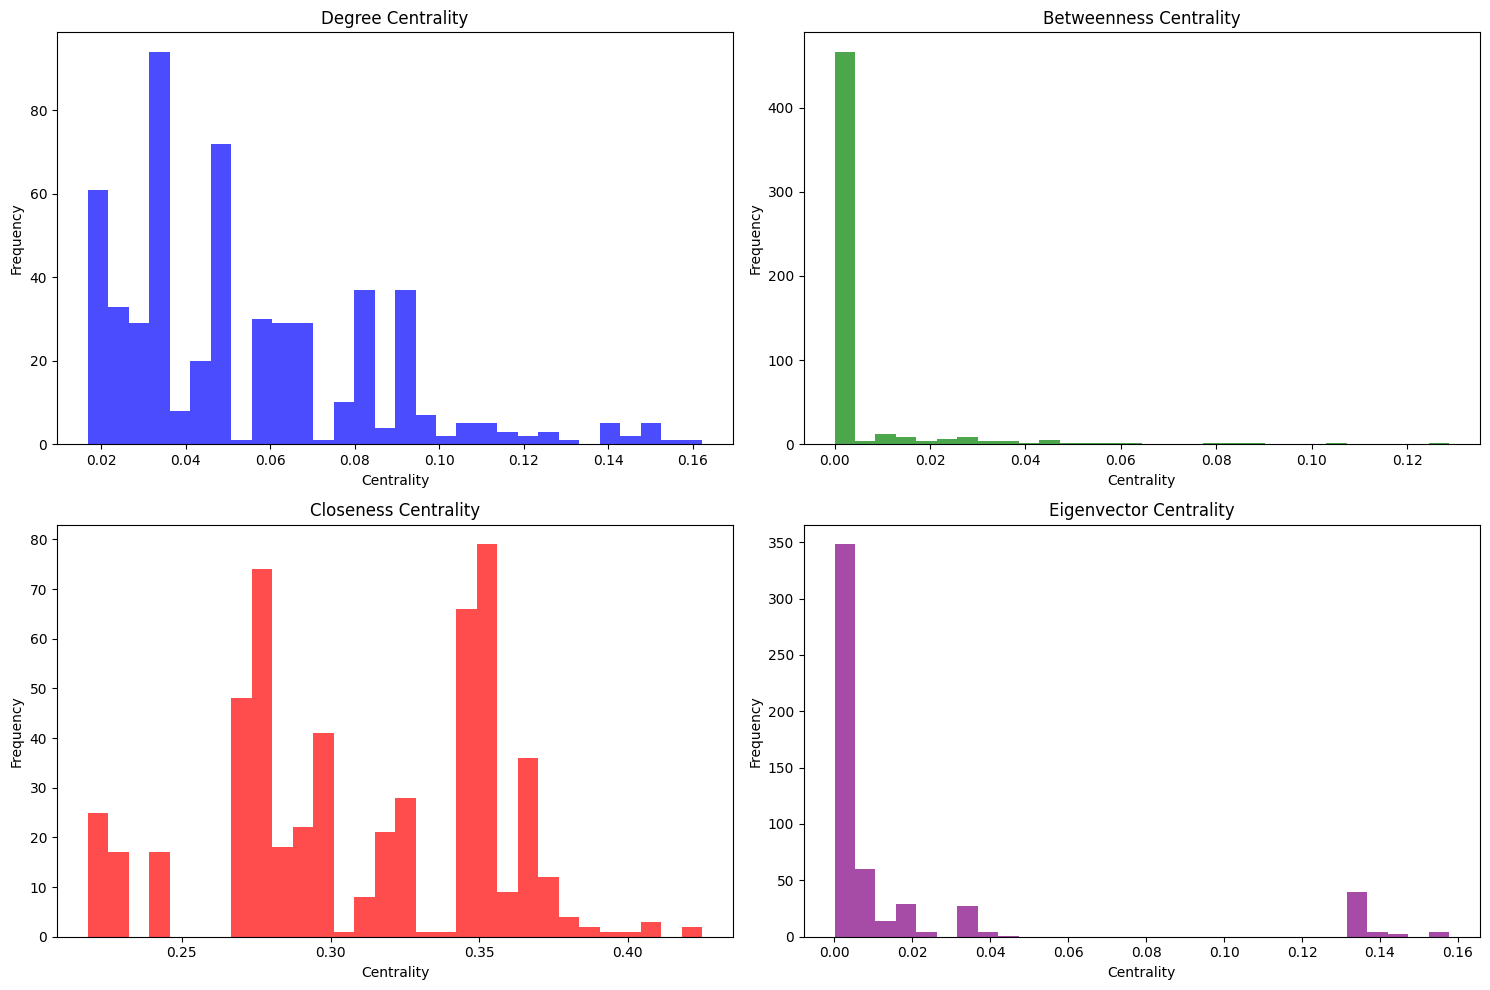

In [ ]:
#Plot histograms for the centrality measures
plt.figure(figsize=(15, 10))

#Plot Degree Centrality
plt.subplot(2, 2, 1)
plt.hist(list(degree_centrality.values()), bins=30, color='blue', alpha=0.7)
plt.title('Degree Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

#Plot Betweenness Centrality
plt.subplot(2, 2, 2)
plt.hist(list(betweenness_centrality.values()), bins=30, color='green', alpha=0.7)
plt.title('Betweenness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

#Plot Closeness Centrality
plt.subplot(2, 2, 3)
plt.hist(list(closeness_centrality.values()), bins=30, color='red', alpha=0.7)
plt.title('Closeness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

#Plot Eigenvector Centrality
plt.subplot(2, 2, 4)
plt.hist(list(eigenvector_centrality.values()), bins=30, color='purple', alpha=0.7)
plt.title('Eigenvector Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

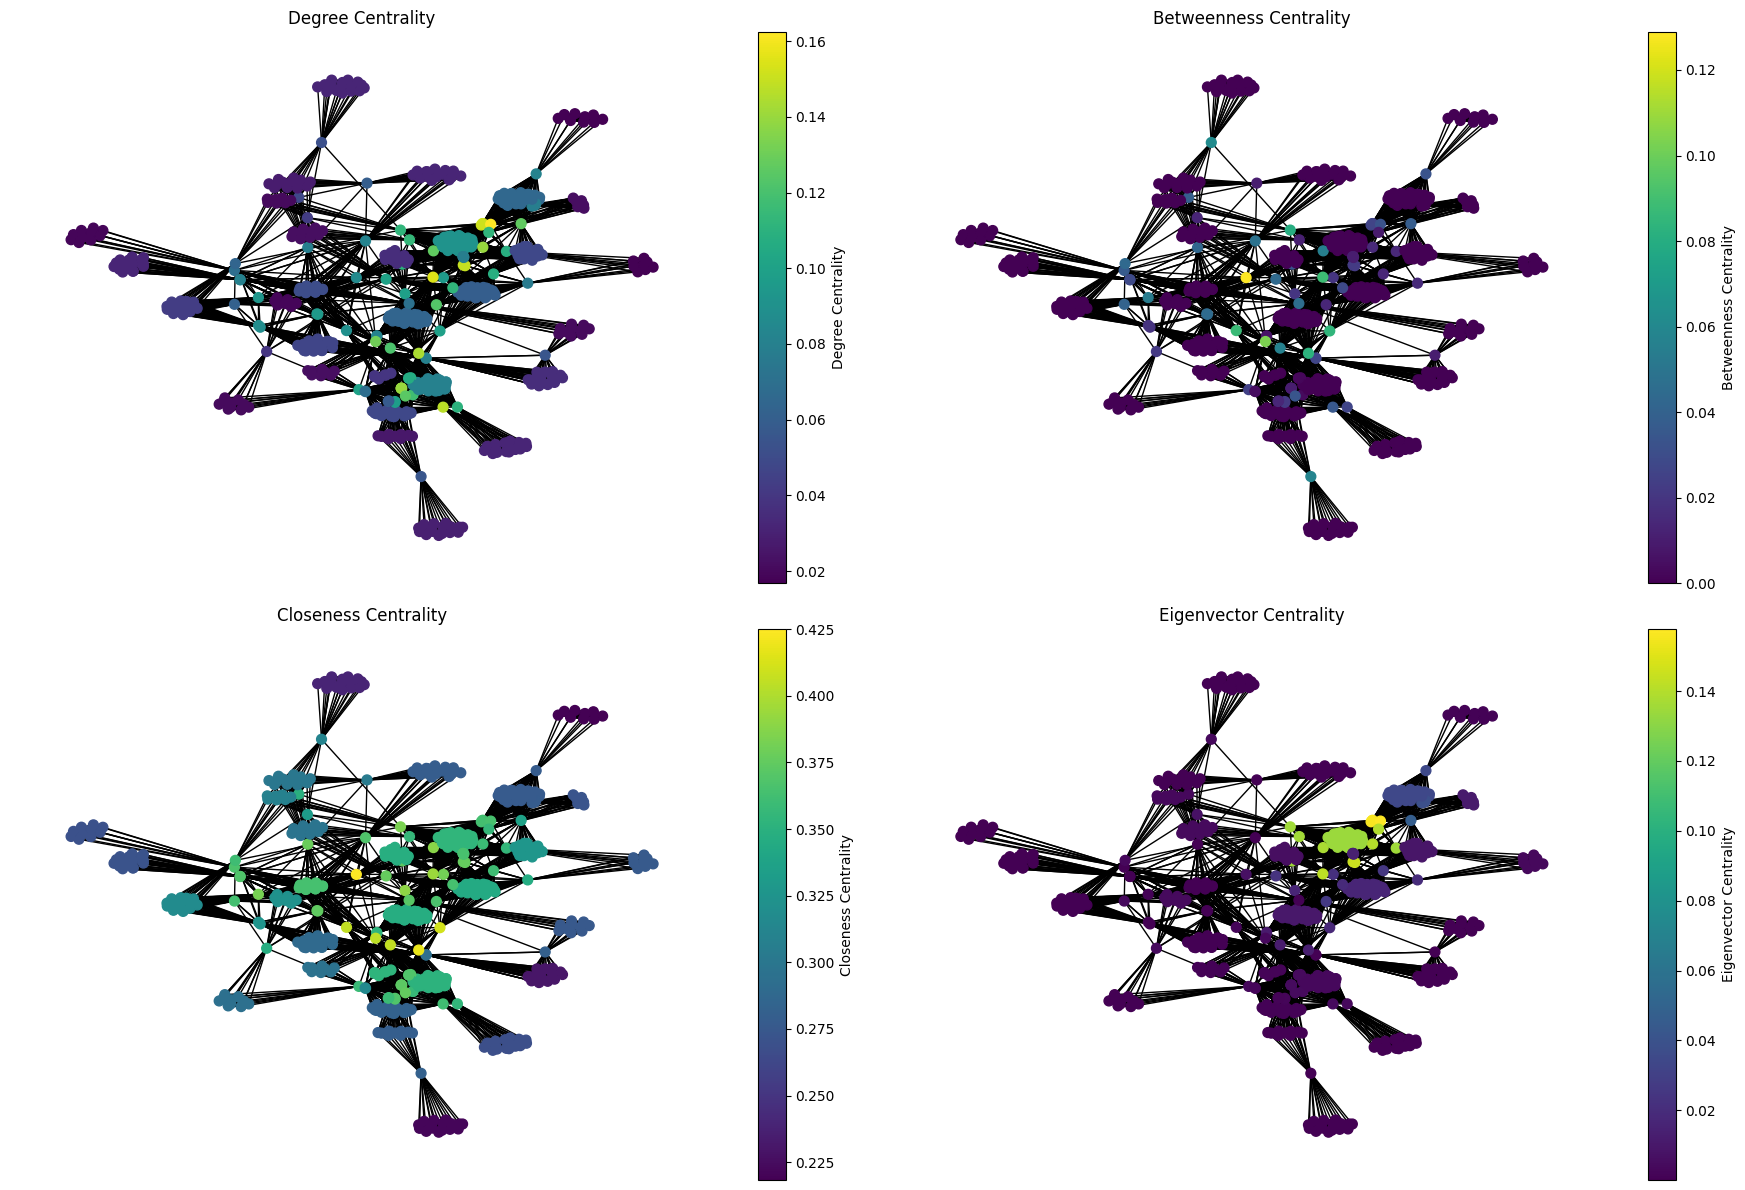

In [ ]:
#Define colormap
cmap = plt.get_cmap('viridis')

#Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

pos = nx.spring_layout(smaller_graph)

#Plot Degree Centrality
axs[0, 0].set_title('Degree Centrality')
nx.draw(smaller_graph, pos, ax=axs[0, 0], node_color=[cmap(value) for value in degree_norm], with_labels=False, node_size=50)
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(degree_values)
cbar = plt.colorbar(sm, ax=axs[0, 0])
cbar.set_label('Degree Centrality')

#Plot Betweenness Centrality
axs[0, 1].set_title('Betweenness Centrality')
nx.draw(smaller_graph, pos, ax=axs[0, 1], node_color=[cmap(value) for value in betweenness_norm], with_labels=False, node_size=50)
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(betweenness_values)
cbar = plt.colorbar(sm, ax=axs[0, 1])
cbar.set_label('Betweenness Centrality')

#Plot Closeness Centrality
axs[1, 0].set_title('Closeness Centrality')
nx.draw(smaller_graph, pos, ax=axs[1, 0], node_color=[cmap(value) for value in closeness_norm], with_labels=False, node_size=50)
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(closeness_values)
cbar = plt.colorbar(sm, ax=axs[1, 0])
cbar.set_label('Closeness Centrality')

#Plot Eigenvector Centrality
axs[1, 1].set_title('Eigenvector Centrality')
nx.draw(smaller_graph, pos, ax=axs[1, 1], node_color=[cmap(value) for value in eigenvector_norm], with_labels=False, node_size=50)
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(eigenvector_values)
cbar = plt.colorbar(sm, ax=axs[1, 1])
cbar.set_label('Eigenvector Centrality')

plt.tight_layout()
plt.show()

In [ ]:
#Load the CSV file containing song data
song_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/smaller/song_data_smaller.csv")

#Create a mapping between song IDs and their labels (names)
song_id_to_label = dict(zip(song_data["song_id"], song_data["song_name"]))

#Find songs with minimum and maximum centrality values for each measure
min_degree_song = min(degree_centrality, key=degree_centrality.get)
max_degree_song = max(degree_centrality, key=degree_centrality.get)

min_betweenness_song = min(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_song = max(betweenness_centrality, key=betweenness_centrality.get)

min_closeness_song = min(closeness_centrality, key=closeness_centrality.get)
max_closeness_song = max(closeness_centrality, key=closeness_centrality.get)

min_eigenvector_song = min(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_song = max(eigenvector_centrality, key=eigenvector_centrality.get)

In [ ]:
#Print songs with minimum and maximum centrality values
print("Degree Centrality:")
print("Minimum centrality song:", song_id_to_label[min_degree_song], "Centrality value:", degree_centrality[min_degree_song])
print("Maximum centrality song:", song_id_to_label[max_degree_song], "Centrality value:", degree_centrality[max_degree_song])

print("\nBetweenness Centrality:")
print("Minimum centrality song:", song_id_to_label[min_betweenness_song], "Centrality value:", betweenness_centrality[min_betweenness_song])
print("Maximum centrality song:", song_id_to_label[max_betweenness_song], "Centrality value:", betweenness_centrality[max_betweenness_song])

print("\nCloseness Centrality:")
print("Minimum centrality song:", song_id_to_label[min_closeness_song], "Centrality value:", closeness_centrality[min_closeness_song])
print("Maximum centrality song:", song_id_to_label[max_closeness_song], "Centrality value:", closeness_centrality[max_closeness_song])

print("\nEigenvector Centrality:")
print("Minimum centrality song:", song_id_to_label[min_eigenvector_song], "Centrality value:", eigenvector_centrality[min_eigenvector_song])
print("Maximum centrality song:", song_id_to_label[max_eigenvector_song], "Centrality value:", eigenvector_centrality[max_eigenvector_song])

Degree Centrality:
Minimum centrality song: Walkin' On The Sun Centrality value: 0.016791044776119403
Maximum centrality song: Take Your Time Centrality value: 0.1623134328358209

Betweenness Centrality:
Minimum centrality song: Juke Box Hero Centrality value: 0.0
Maximum centrality song: Lost In My Mind Centrality value: 0.12880434316149217

Closeness Centrality:
Minimum centrality song: Cruise Centrality value: 0.21832993890020366
Maximum centrality song: Lost In My Mind Centrality value: 0.42505947660586835

Eigenvector Centrality:
Minimum centrality song: Juke Box Hero Centrality value: 4.084216235227727e-06
Maximum centrality song: Take Your Time Centrality value: 0.15777699766715703
